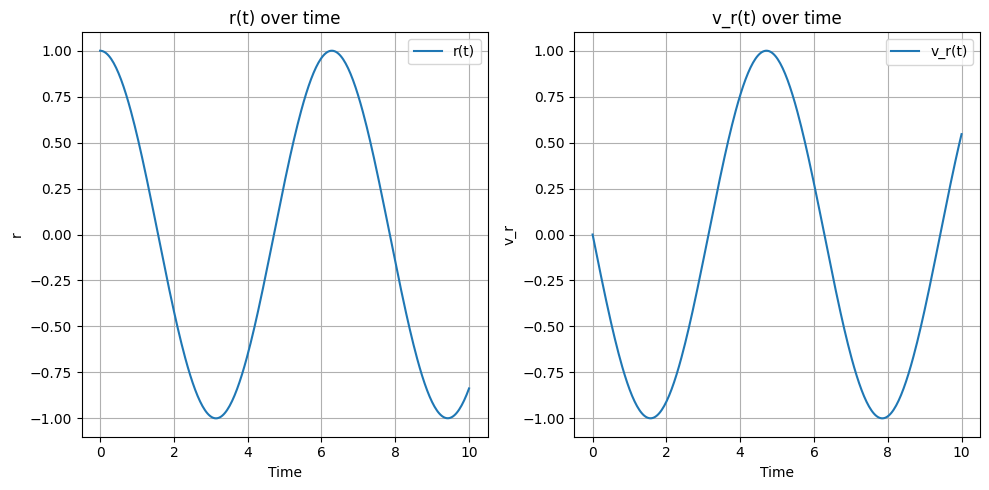

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the ODE system
def ode_system(t, x):
    r, v_r = x
    f_r = -r  # Example function, replace with your actual function f(r)
    return [v_r, f_r]

# Initial conditions
r0 = 1.0  # Initial value of r
vr0 = 0.0  # Initial velocity v_r
initial_conditions = [r0, vr0]

# Time span for the solution
t_span = (0, 10)  # From t=0 to t=10
t_eval = np.linspace(t_span[0], t_span[1], 300)  # Points at which to store the solution

# Solve the ODE
sol = solve_ivp(ode_system, t_span, initial_conditions, t_eval=t_eval)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0], label='r(t)')
plt.title('r(t) over time')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(sol.t, sol.y[1], label='v_r(t)')
plt.title('v_r(t) over time')
plt.xlabel('Time')
plt.ylabel('v_r')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [211]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


G = 6.67430e-11
B = 0.11
Me = 5.9722e24

def rho(r, phi):

    return 0

def ode_system(t, x):
    r, vr, phi, v_phi = x
    d_vr = - (G*Me/r**2) + (v_phi**2)/r # Wrong, missed the product rule
    print((v_phi**2)/r)
    d_phi = v_phi/r
    d_v_phi = (vr*v_phi)/r * (1 - 0.5*rho(r, phi)*v_phi * B)

    return np.array([vr, d_vr, d_phi, d_v_phi])


In [221]:
r = 6378136.6+200000
v_phi = 60 * 4.848e-6


x0 = np.array([r, 0 , 0, v_phi])

dx = ode_system(0, x0)

1.3224346351092285e-14


In [222]:
x0

array([6.3981366e+06, 0.0000000e+00, 0.0000000e+00, 2.9088000e-04])

In [223]:
x0 + dx*dt

array([ 6.39813660e+06, -9.73717669e-02,  4.54632369e-13,  2.90880000e-04])

In [229]:
dt = 0.01
n_steps = 100000
xs = []
xs += x0,


for i in range(n_steps):
    dx = ode_system(0, x0)
    x0 = x0+dx*dt
    xs += x0,
    if x0[0] < 0.01:
        print(x0[0])
        break

xs = np.array(xs)

1.312347075171802e-14
1.312345052296144e-14
1.312343029216122e-14
1.3123410059317351e-14
1.3123389824429832e-14
1.3123369587498648e-14
1.3123349348523803e-14
1.3123329107505283e-14
1.312330886444308e-14
1.3123288619337194e-14
1.3123268372187614e-14
1.3123248122994335e-14
1.3123227871757351e-14
1.312320761847666e-14
1.3123187363152248e-14
1.3123167105784112e-14
1.3123146846372248e-14
1.3123126584916642e-14
1.3123106321417297e-14
1.31230860558742e-14
1.312306578828735e-14
1.3123045518656738e-14
1.312302524698236e-14
1.3123004973264209e-14
1.3122984697502273e-14
1.3122964419696553e-14
1.3122944139847039e-14
1.3122923857953724e-14
1.3122903574016602e-14
1.3122883288035672e-14
1.3122863000010922e-14
1.312284270994235e-14
1.3122822417829946e-14
1.3122802123673705e-14
1.3122781827473619e-14
1.3122761529229682e-14
1.3122741228941893e-14
1.3122720926610239e-14
1.3122700622234715e-14
1.3122680315815314e-14
1.3122660007352033e-14
1.3122639696844867e-14
1.3122619384293803e-14
1.3122599069698842e-1

In [230]:
x0[0]

-996.1095722854006

In [231]:
xs.T[0]

array([ 6.34933148e+06,  6.34932169e+06,  6.34931190e+06, ...,
        6.48287219e+03,  3.21759616e+03, -9.96109572e+02])

In [232]:
len(xs.T[1])

80041

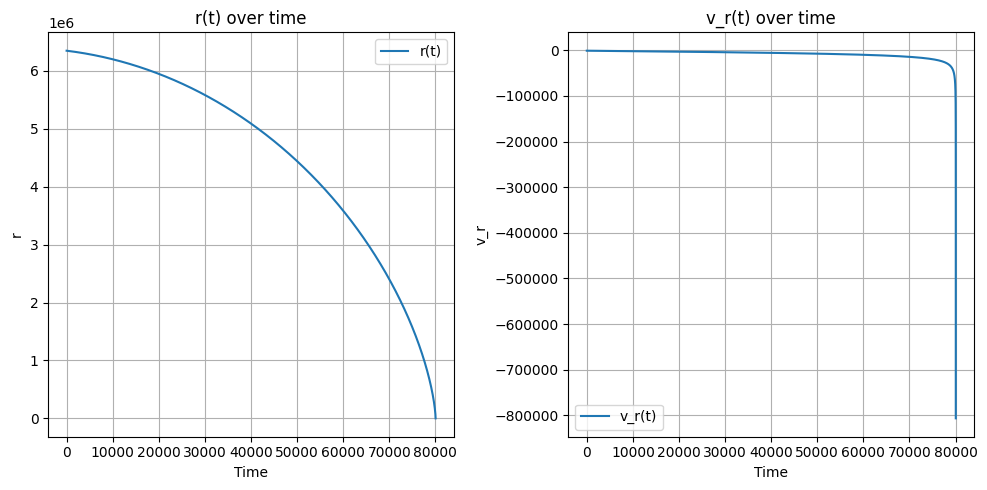

In [233]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(len(xs.T[1])), xs.T[0], label='r(t)')
plt.title('r(t) over time')
plt.xlabel('Time')
plt.ylabel('r')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(len(xs.T[1])), xs.T[1], label='v_r(t)')
plt.title('v_r(t) over time')
plt.xlabel('Time')
plt.ylabel('v_r')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()